# Results visualization - Accuracy according to distance between galaxies

## Contents
---

1. [Non padded images](#1.-Non-padded-images)
1. [Padded images](#2.-Padded-images)

In [1]:
"""Import functions from annex"""
from annex_new import import_
from annex_new import get_distance
from annex_new import get_ellipticity
from annex_new import get_bh_errors
from annex_new import get_sep_errors
from annex_new import get_distance_errors
from annex_new import count_per_bin
from annex_new import get_bh_results
from annex_new import get_sep_results

from annex_new import get_mean_acc
from annex_new import plot_acc_distances

### Path

In [4]:
"""Check the folders hierarchy"""
from os.path import expanduser
user_home = expanduser("~")
path = user_home+'/Cosmostat/Codes/BlendHunter'

# 1. Non padded images

### Data

In [5]:
""""Retrieve results for non padded images """
bh_results = get_bh_results(path_bh_results = path+'/bh_results')
sep_results = get_sep_results(path_sep_results = path+'/sep_results')

"""Compute distance for the whole test set from params x and y. Check path."""
distance = get_distance(path=path)

"""Retrieve missed blends for sep and bh"""
bh_errors = [[get_bh_errors(results=bh_results[i][j]) for j in range(len(bh_results[i]))] for i in range(len(bh_results))]

sep_errors = [[get_sep_errors(results=sep_results[i][j]) for j in range(len(sep_results[i]))] for i in range(len(sep_results))]

"""For each noise realisation and each noise level, retrieve the distances corresponding to the missed blends"""

distances_errors_bh = [[get_distance_errors(distance, errors = bh_errors[i][j]) for j in range(len(bh_errors[i]))] for i in range(len(bh_errors))]

distances_errors_sep = [[get_distance_errors(distance, errors = sep_errors[i][j]) for j in range(len(sep_errors[i]))] for i in range(len(sep_errors))]

# Distribution of distances in errors

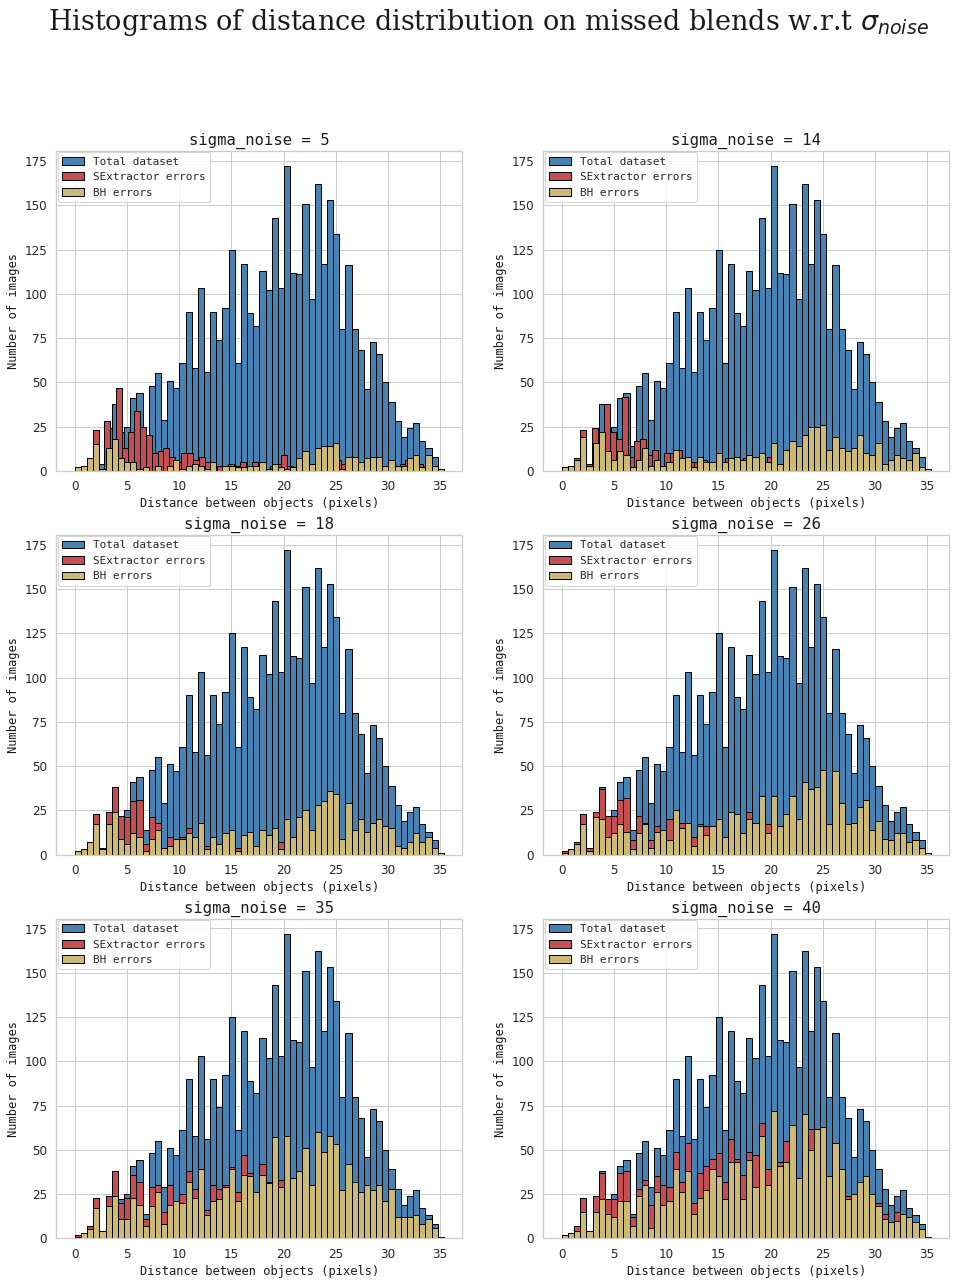

In [6]:
"""Plot distance histograms for each noise level"""

from annex_new import plot_distribution

plot_distribution(total_data=distance, bh_data=[distances_errors_bh[i][0] for i in range(len(bh_errors))], 
                  sep_data=[distances_errors_sep[i][0] for i in range(len(sep_errors))],
                      font_size=12, TITLE='Histograms of distance distribution on missed blends w.r.t $\sigma_{noise}$', nb_col=2, nb_lines=3, 
                      sigma_val= [5, 14, 18, 26, 35, 40], 
                      xlabel='Distance between objects (pixels)', 
                      ylabel='Number of images', legend_size=18)

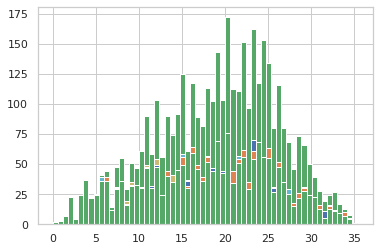

In [7]:
"""Retrieve the mean distance per bin for x axis"""
mean_distance_per_bin = get_mean_acc(get_mean_total=True, data_total=distance)

"""Compute the mean accuracy ratio (on all noise realisations) for each bin and each noise level"""
mean_acc_bh = get_mean_acc(data=distances_errors_bh, data_total=distance, nb_ratios = 60)
mean_acc_sep = get_mean_acc(data=distances_errors_sep, data_total=distance, nb_ratios = 60)

# Accuracy according to distance

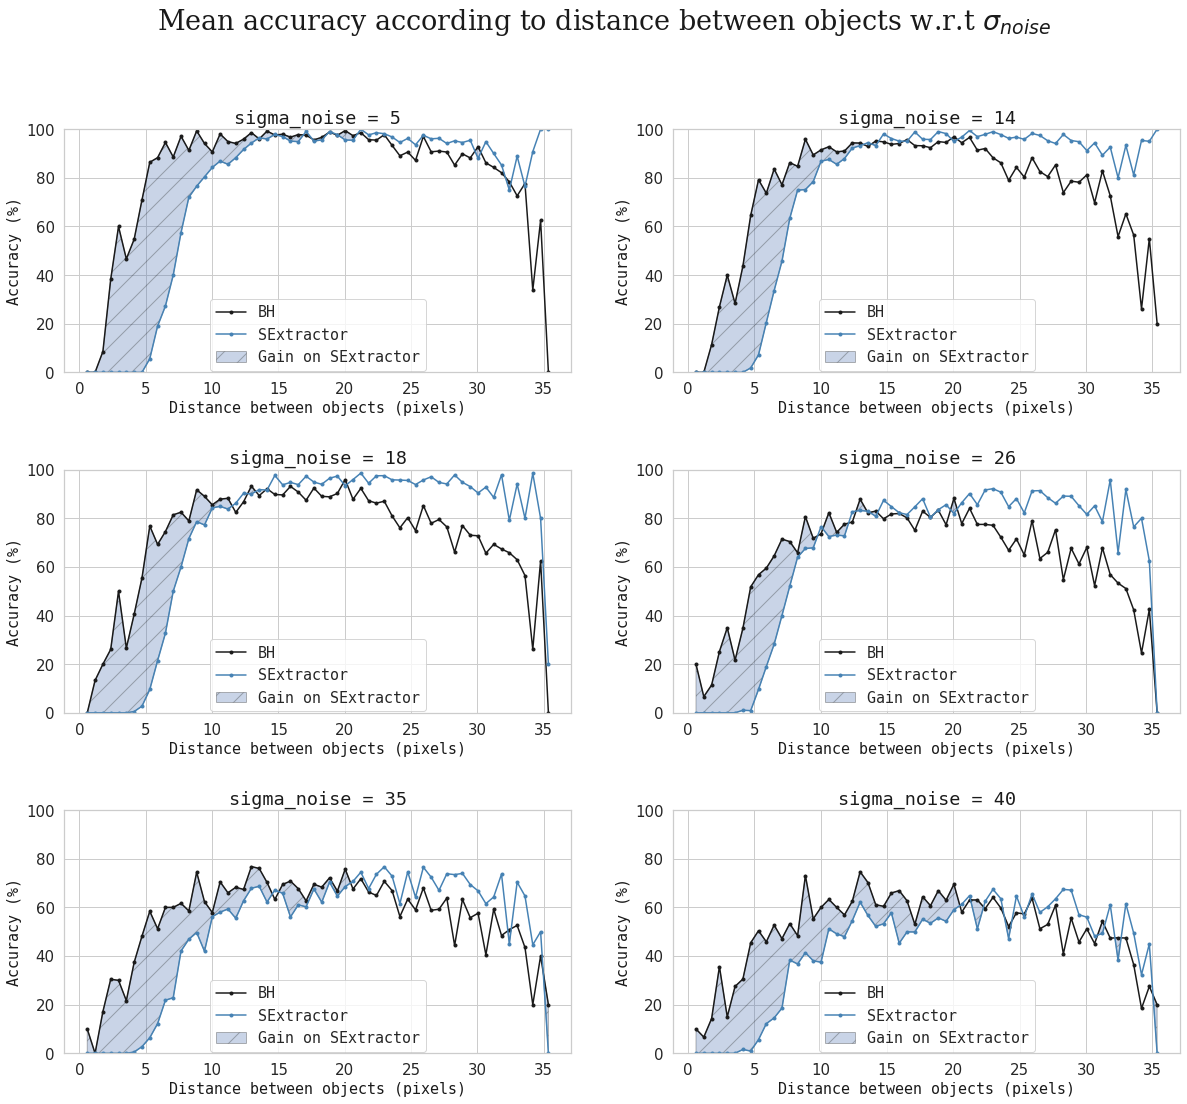

In [8]:
"""Plot the accuracy for sep and bh + comparison"""
plot_acc_distances(x_axis =mean_distance_per_bin, accuracy_bh=mean_acc_bh, accuracy_sep=mean_acc_sep,
                       TITLE = 'Mean accuracy according to distance between objects w.r.t $\sigma_{noise}$', 
                     nb_col=2, nb_lines=3, size_plot=(20,17) , sigma_val=[5,14,18,26,35,40],
                      xlabel = 'Distance between objects (pixels)', ylabel = 'Accuracy (%)')  

# 2. Padded images

### Data

In [9]:
""""Retrieve results for padded images """
bh_pad = get_bh_results(path_bh_results =path+'/bh_pad_results', pad_images=True)
sep_pad = get_sep_results(path_sep_results =path+'/sep_pad_results', pad_images=True)

"""Compute distance for the whole test set from params x and y. Check path."""
distance = get_distance(path=path+'/bh')

"""Retrieve missed blends for padded images"""
bh_errors_pad = [[get_bh_errors(results=bh_pad[i][j]) for j in range(len(bh_pad[i]))] for i in range(len(bh_pad))]

sep_errors_pad = [[get_sep_errors(results=sep_pad[i][j]) for j in range(len(sep_pad[i]))] for i in range(len(sep_pad))]

"""For each noise realisation and each noise level, retrieve the distances corresponding to the missed blends"""
distances_errors_bh_pad = [[get_distance_errors(distance, errors = bh_errors_pad[i][j]) for j in range(len(bh_errors_pad[i]))] for i in range(len(bh_errors_pad))]
distances_errors_sep_pad = [[get_distance_errors(distance, errors = sep_errors_pad[i][j]) for j in range(len(sep_errors_pad[i]))] for i in range(len(sep_errors_pad))]

## Distribution of distances in errors

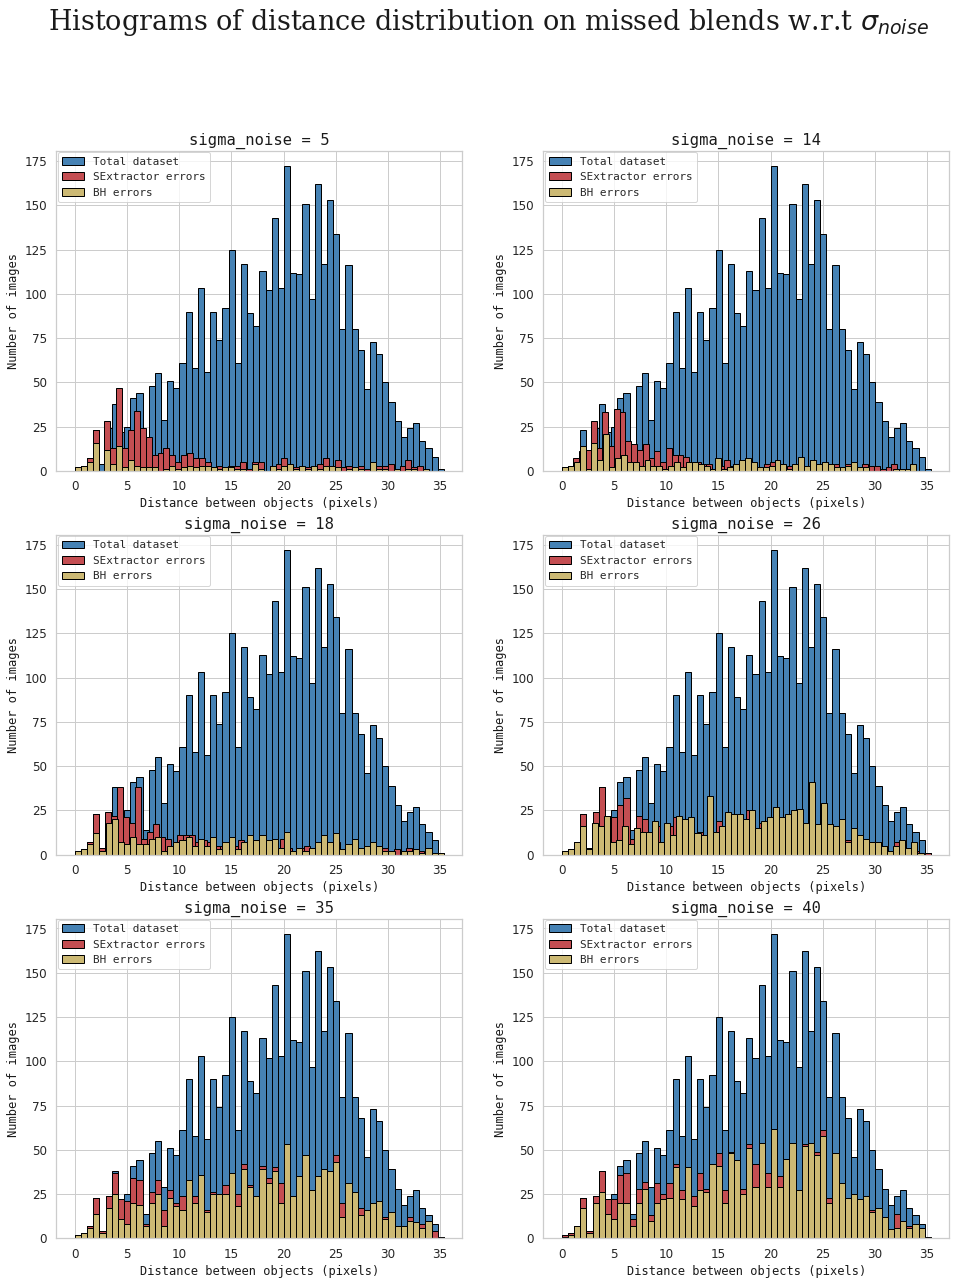

In [10]:
from annex_new import plot_distribution

"""Plot histograms of distance for spe and bh results"""

plot_distribution(total_data=distance, bh_data=[distances_errors_bh_pad[i][0] for i in range(len(bh_errors_pad))], 
                  sep_data=[distances_errors_sep_pad[i][0] for i in range(len(sep_errors_pad))],
                      font_size=12, TITLE='Histograms of distance distribution on missed blends w.r.t $\sigma_{noise}$', nb_col=2, nb_lines=3, 
                      sigma_val= [5, 14, 18, 26, 35, 40], 
                      xlabel='Distance between objects (pixels)', 
                      ylabel='Number of images', legend_size=25)

## Accuracy according to distance

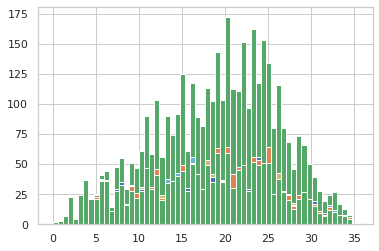

In [11]:
"""Retrieve the mean distance per bin for x axis"""
mean_distance_per_bin = get_mean_acc(get_mean_total=True, data_total=distance)

"""Compute the mean accuracy ratio (on all noise realisations) for each bin and each noise level"""
mean_acc_bh_pad = get_mean_acc(data=distances_errors_bh_pad, data_total=distance, nb_ratios = 60)
mean_acc_sep_pad = get_mean_acc(data=distances_errors_sep_pad, data_total=distance, nb_ratios = 60)

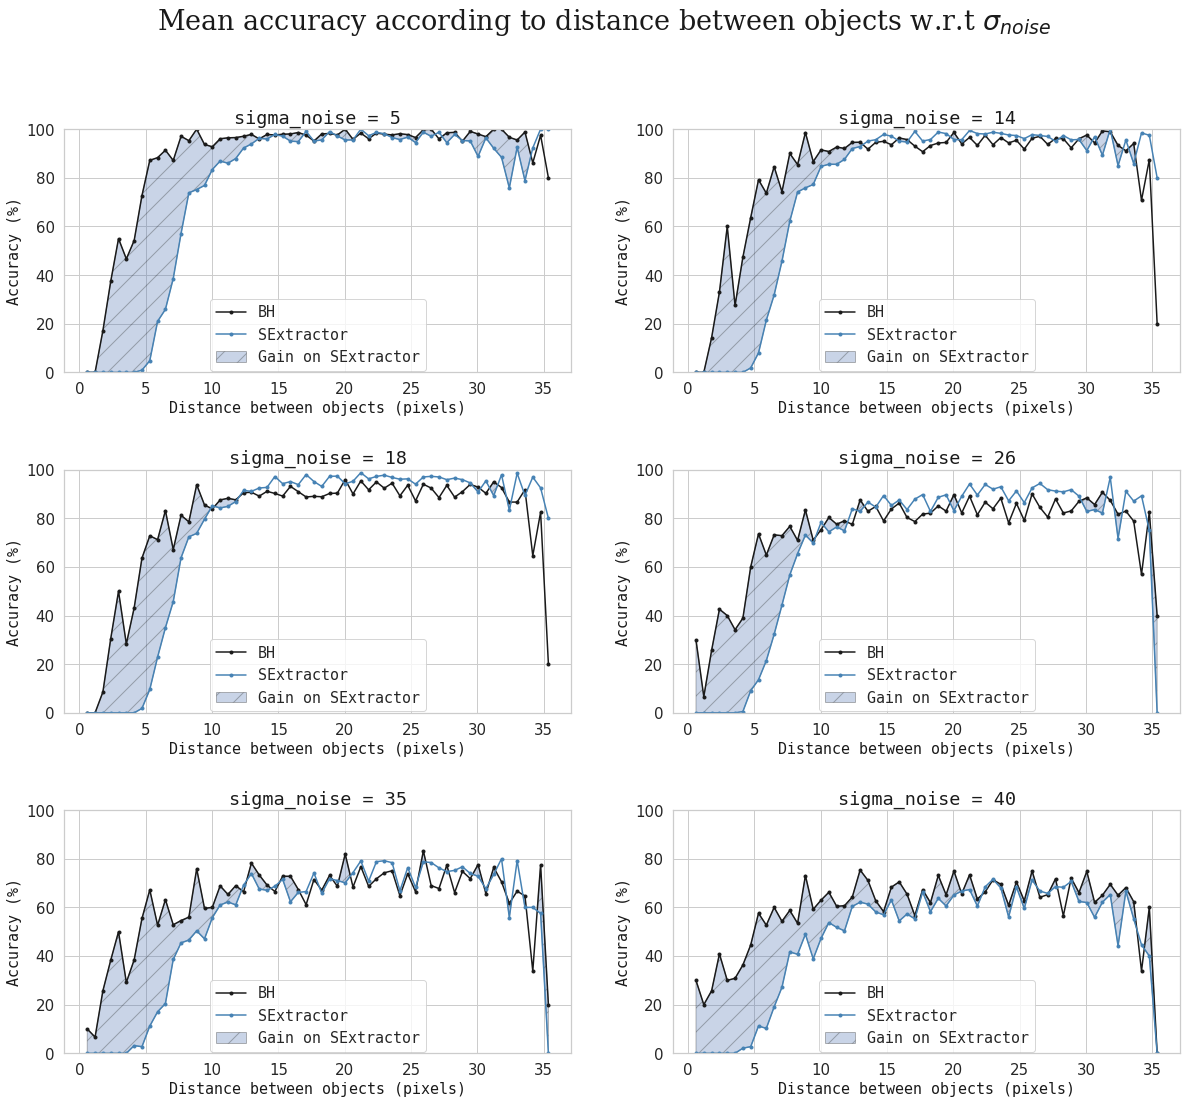

In [12]:
"""Plot the accuracy for sep and bh + comparison"""
plot_acc_distances(x_axis =mean_distance_per_bin, accuracy_bh=mean_acc_bh_pad, accuracy_sep=mean_acc_sep_pad,
                       TITLE = 'Mean accuracy according to distance between objects w.r.t $\sigma_{noise}$', 
                     nb_col=2, nb_lines=3, size_plot=(20,17) , sigma_val=[5,14,18,26,35,40],
                      xlabel = 'Distance between objects (pixels)', ylabel = 'Accuracy (%)')  

## Accuracy comparison between padded and non padded

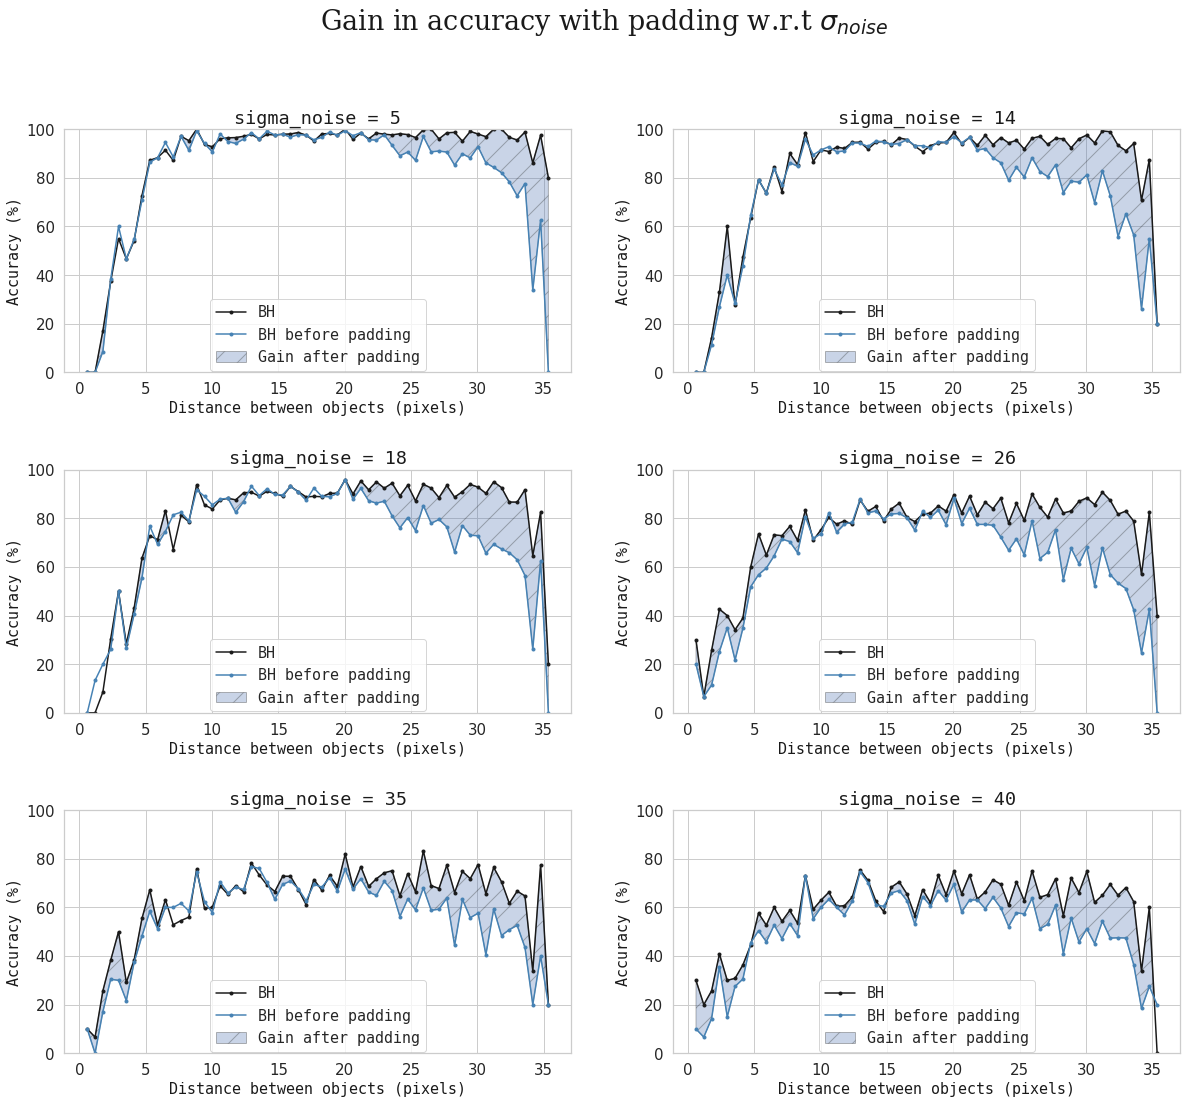

In [16]:
"""Run results for padded and non padded images"""

plot_acc_distances(x_axis =mean_distance_per_bin, accuracy_bh=mean_acc_bh_pad, accuracy_sep=mean_acc_bh,
                       TITLE = 'Gain in accuracy with padding w.r.t $\sigma_{noise}$', 
                     nb_col=2, nb_lines=3, size_plot=(20,17) , sigma_val=[5,14,18,26,35,40],
                      xlabel = 'Distance between objects (pixels)', ylabel = 'Accuracy (%)', filling_label='Gain after padding',
                  label2='BH before padding')  